In [1]:
#usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
 
# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [3]:
#loading the data
url='https://drive.google.com/file/d/1ggRw-tVMCSCiqz5sw8If5f3vhPlHxW2f/view?usp=sharing'
RawData = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
complaints = pd.read_csv(RawData, dtype='unicode')

In [4]:
#let's take a look at the data
complaints.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349,201984,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"


Now we will try to find where descriptor is 'Load Talking'

In [7]:
#filtering the descriptor section to Loud Talking only
LoudTalk_complaints = complaints[complaints['Descriptor'] == 'Loud Talking']


In [8]:
#quick look
LoudTalk_complaints.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10011,258 WEST 15 STREET,WEST 15 STREET,7 AVENUE,8 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:44:14 AM,10/31/2013 02:00:56 AM,04 MANHATTAN,MANHATTAN,984031,208847,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.73991339303542,-74.00079028612932,"(40.73991339303542, -74.00079028612932)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,PRINCETON LANE,HAMPTON GREEN,DEAD END,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:35:18 AM,10/31/2013 01:45:17 AM,03 STATEN ISLAND,STATEN ISLAND,929577,140964,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.55342078716953,-74.19674315017886,"(40.55342078716953, -74.19674315017886)"


In [36]:
#selecting only Descriptor & City columns to simplify things 
LoudTalk_complaints= LoudTalk_complaints[['Descriptor','City']]
LoudTalk_complaints.info

<bound method DataFrame.info of           Descriptor           City
0       Loud Talking        JAMAICA
8       Loud Talking       NEW YORK
25      Loud Talking  STATEN ISLAND
28      Loud Talking       NEW YORK
44      Loud Talking          BRONX
...              ...            ...
111054  Loud Talking       BROOKLYN
111055  Loud Talking       BROOKLYN
111059  Loud Talking       NEW YORK
111066  Loud Talking       NEW YORK
111067  Loud Talking       BROOKLYN

[1272 rows x 2 columns]>

So, now we have a seperated dataset contains all the cities that complained about Loud Talking

In [38]:
# Counting How many each city complained about Loud Talking
LoudTalk_complaints['City'].value_counts()

NEW YORK               527
BROOKLYN               318
BRONX                  203
ASTORIA                 40
STATEN ISLAND           19
FAR ROCKAWAY            14
LONG ISLAND CITY        14
WOODSIDE                13
SUNNYSIDE               12
WOODHAVEN               11
JAMAICA                  9
KEW GARDENS              8
JACKSON HEIGHTS          7
FLUSHING                 7
RIDGEWOOD                7
ELMHURST                 6
RICHMOND HILL            5
SOUTH OZONE PARK         5
FOREST HILLS             5
REGO PARK                3
OAKLAND GARDENS          3
CORONA                   3
OZONE PARK               3
QUEENS VILLAGE           3
SPRINGFIELD GARDENS      3
FRESH MEADOWS            3
MASPETH                  2
LITTLE NECK              2
HOWARD BEACH             2
EAST ELMHURST            2
MIDDLE VILLAGE           2
ROCKAWAY PARK            1
CAMBRIA HEIGHTS          1
HOLLIS                   1
COLLEGE POINT            1
BELLEROSE                1
ARVERNE                  1
G

As we can see, the numbers differs from hundreds to ones, therefore we're selecting the cities with a high complains numbers

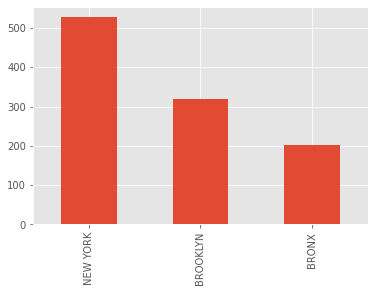

In [41]:
# Plotting the most 3 whining cities
LoudTalk_complaints['City'].value_counts()[:3].plot(kind='bar')


As showen, the award of most complaining city goes to NY.